In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

In [16]:
SPINE_COLOR = "grey"
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    fig_width = 3.37
    fig_height = 1.5


    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
            #   'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 9, # fontsize for x and y labels (was 10)
              'axes.titlesize': 9,
              'font.size': 9, # was 10
              'legend.fontsize': 9, # was 10
              'xtick.labelsize': 9,
              'ytick.labelsize': 9,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)

def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [47]:
with xr.open_dataset("/opt/aqmsp_models/models/config_s2/anp/cpcb_ijcai24_dec23/config1/fold_3/predictions.nc") as res_ds:
    pass

# calculate station-wise rmse
rmse = res_ds.to_dataframe().groupby("station").apply(lambda x: (x["PM2.5"] - x["PM2.5_pred"]).pow(2).mean() ** 0.5)
rmse

station
Alipur_Delhi_DPCC                65.526489
Anand_Vihar_Delhi_DPCC           85.029003
Arya_Nagar_Bahadurgarh_HSPCB    119.513149
Dwarka_Sector_8_Delhi_DPCC_      55.065937
ITO_Delhi_CPCB                   59.105858
Patparganj_Delhi_DPCC            56.146214
R_K_Puram_Delhi_DPCC             79.675788
Sanjay_Nagar_Ghaziabad_UPPCB     65.466951
Sector_2_IMT_Manesar_HSPCB       59.113939
Sector_51_Gurugram_HSPCB         58.827083
Vivek_Vihar_Delhi_DPCC           65.497061
dtype: float64

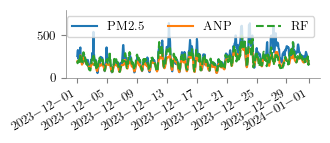

In [56]:
latexify(fig_width=3.37/2, fig_height=1.5)
fig, ax = plt.subplots()
res_ds.sel(station="Anand_Vihar_Delhi_DPCC")["PM2.5"].plot(ax=ax, label="PM2.5")
res_ds.sel(station="Anand_Vihar_Delhi_DPCC")["PM2.5_pred"].plot(ax=ax, label="ANP")
xr.open_dataset("/opt/aqmsp_models/models/config_s2/rf/cpcb_ijcai24_dec23/config1/fold_3/predictions.nc").sel(station="Arya_Nagar_Bahadurgarh_HSPCB")["PM2.5_pred"].plot(ax=ax, label="RF", linestyle="--")
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
ax.legend(ncols=3)
format_axes(ax)
ax.set_ylim(-5, 800)
plt.tight_layout()
fig.savefig("anand_vihar_low_pred.pdf")

In [1]:
latexify(fig_width=3.37/2, fig_height=2)
fig, ax = plt.subplots(figsize=(3.37, 3))
res_ds.sel(station="Arya_Nagar_Bahadurgarh_HSPCB")["PM2.5"].plot(ax=ax, label="PM2.5")
res_ds.sel(station="Arya_Nagar_Bahadurgarh_HSPCB")["PM2.5_pred"].plot(ax=ax, label="ANP")
xr.open_dataset("/opt/aqmsp_models/models/config_s2/rf/cpcb_ijcai24_dec23/config1/fold_3/predictions.nc").sel(station="Arya_Nagar_Bahadurgarh_HSPCB")["PM2.5_pred"].plot(ax=ax, label="RF", linestyle="--")
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
ax.legend(ncols=3)
ax.set_ylim(-5, 700)
format_axes(ax)
plt.tight_layout()
fig.savefig("arya_nagar_high_pred.pdf")

NameError: name 'latexify' is not defined